# Trabajo de Predicción
El objetivo de este trabajo consiste en aplicar la técnica de Random Forest utilizando un archivo con datos acerca de los clicks recibidos desde un portal metabuscador de hoteles. De esta manera, se podrán predecir si estas búsquedas terminan o no en una reserva consolidada.

# Lectura y Visualización de Datos
Lo primero que se realiza es la lectura de los datos proporcionados. Además, se visualizarán algunos de los datos de los que se compone el archivo, de tal manera que se puedan comprender los mismos.

In [1]:
# Importación del paquete Pandas para la lectura del archivo.
import pandas as pd

In [2]:
# Carga del archivo con los datos.
data = pd.read_csv("./clicks.csv")

In [3]:
# Visualización de los primeros elementos.
data.head(5)

,date,remite_id,checkin,checkout,adults,children,hotel_id,sale
0,2016-04-01,89,2016-04-18,2016-04-26,2,0,255858,0
1,2016-04-01,89,2016-05-27,2016-05-28,2,2,80563,0
2,2016-04-01,89,2016-06-18,2016-06-19,2,0,165762,0
3,2016-04-01,89,2016-06-18,2016-06-19,2,0,165762,0
4,2016-04-01,89,2016-07-13,2016-08-20,2,0,849,0


In [4]:
print ("Características iniciales: " + str(len(data.columns)))
print ("Elementos totales: " + str(len(data.index)))

Características iniciales: 8
Elementos totales: 158161


In [5]:
# Visualización de los tipos de datos contenidos en el archivo.
data.dtypes

date         object
remite_id     int64
checkin      object
checkout     object
adults        int64
children      int64
hotel_id      int64
sale          int64
dtype: object

In [6]:
# Visualización de las variables junto con el total de los diferentes valores que toma cada una.

caracteristicas = data.columns

for caracteristica in caracteristicas:
    print ("Valores diferentes para la característica '" + caracteristica + "':")
    print (data[caracteristica].value_counts())

    if "sale" != caracteristica:
        print ("\n")

Valores diferentes para la característica 'date':
2016-04-04    25001
2016-04-01    24225
2016-04-05    23563
2016-04-03    23552
2016-04-06    22394
2016-04-07    20342
2016-04-02    19084
Name: date, dtype: int64


Valores diferentes para la característica 'remite_id':
27     126015
130     15892
89      13912
316      1645
317       697
Name: remite_id, dtype: int64


Valores diferentes para la característica 'checkin':
2016-04-24    9026
2016-04-09    4768
2016-04-08    4479
2016-04-10    3882
2016-04-30    3270
2016-04-29    3235
2016-04-22    3122
2016-04-17    2966
2016-04-15    2910
2016-04-23    2689
2016-04-16    2621
2016-04-02    2260
2016-05-01    2235
2016-05-13    2094
2016-08-01    2093
2016-05-14    2061
2016-04-05    1974
2016-04-07    1935
2016-04-03    1761
2016-05-06    1667
2016-07-04    1631
2016-07-18    1607
2016-05-07    1557
2016-08-08    1532
2016-08-15    1501
2016-04-11    1438
2016-04-06    1413
2016-08-22    1388
2016-07-01    1315
2016-05-27    1259
   

Como se puede observar, existe un total de 8 características y 158.161 elementos dentro del archivo proporcionado. Como se describe en el enunciado, las características son las siguientes:
   - date (objeto). Fecha del click (acotado a una semana, como se ve en los resultados anteriores)
   - remite_id (int64). Mercado geográfico del portal.
   - checkin (objeto). Fecha de checkin en la búsqueda.
   - checkout (objeto). Fecha de checkout en la búsqueda.
   - adults (int64). Número de adultos en la búsqueda.
   - children (int64). Número de niños en la búsqueda.
   - hotel_id (int64). Hotel en el que se ha hecho click.
   - sale (int64). Si el click resultó en una reserva (1) o no (0).

Además, no existen datos nulos en el archivo, por lo que no será necesario su tratamiento antes de trabajar con los datos.

In [7]:
# Obtención de datos estadísticos de las variables cuantitativas iniciales.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
remite_id,158161.0,47.086842,47.328124,27.0,27.0,27.0,27.0,317.0
adults,158161.0,2.016970,0.397708,1.0,2.0,2.0,2.0,5.0
children,158161.0,0.469819,0.786577,0.0,0.0,0.0,1.0,4.0
hotel_id,158161.0,125089.567295,97022.122353,4.0,4676.0,151728.0,192149.0,398894.0
sale,158161.0,0.019543,0.138425,0.0,0.0,0.0,0.0,1.0


# Tratamiento y Graficado de los Datos Iniciales

In [8]:
# Importación de paquetes necesarios para la representación gráfica de los datos.
import matplotlib.pyplot as plt
import seaborn as sb

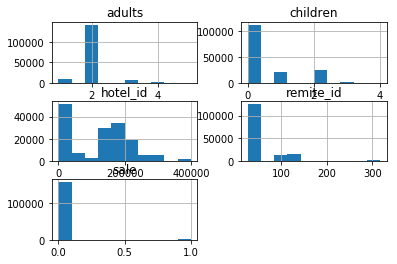

In [9]:
# Visualización de los valores del dataset
data.hist()
plt.show()

Como se puede observar en las gráficas anteriores, y mirando a los resultados de la ejecución de celdas anteriores, se desprenden algunos hechos. El primero, que la fecha de check-in y check-out para la mayoría de los viajes era para ese mismo año, aunque hay una minoría para el año siguiente. La cantidad de adultos mayoritaria en las consultas era de 2. De igual manera, la cantidad de niños en la mayoría de las consultas fue de 0. Por último, únicamente el 1.954% de las búsquedas resultó en una reserva final.

# Predicción
A continuación, se realizarán los pasos necesarios para llevar a cabo una predicción utilizando la técnica de *Random Forest*. Para ello, se han seleccionado las características *remite_id*, *adults*, *children* y *hotel_id*, descartando las relacionadas con las fechas, puesto que no se consideran de relevancia para la consecución del objetivo de predicción.

In [10]:
# Selección de características a utilizar y 'target'
pred_caract = ['remite_id', 'adults', 'children', 'hotel_id']
target = ['sale']

# Extracción de las características que se utilizarán para la predicción.
X = data[pred_caract]

# Extracción de la característica a ser predicha (sale).
y = data[target]

En el caso de que se utilice una separación de los registros de manera aleatoria, se utilizarían las líneas contenidas en las dos siguientes celdas. Aunque se puede definir un *random_state* a la hora de llamar a la función *train_test_split* como semilla para la aleatoriedad de la generación de los diferentes *subsets* (definido a 0 en el ejemplo), de manera que se pueda conseguir un resultado determinista, se ha optado por separar los datos por fechas. Esta decisión ha sido tomada en base a la documentación proporcionada de la asignatura de DSI, donde se recomienda que, siempre y cuando haya una <<dimensión temporal para cortar>>, se realice esta tarea de manera estática.

Por tanto, en lugar de utilizar un 60% para entrenamiento (0.6 x 158161=94.897) y 40% para evaluación (0.4 x 158161=63.264), se utilizarán las fechas de búsqueda de los registros, ya que el tiempo de estas es de una semana. Finalmente, se decide dividir los registros del 2016-04-01 al 2016-04-04 para entrenamiento y del 2016-04-05 al 2016-04-07 para evaluación.

In [11]:
fechas_train = ('2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04')
fechas_test = ('2016-04-05', '2016-04-06', '2016-04-07')

In [12]:
X_train = X.loc[data['date'].isin(fechas_train)]
X_test = X.loc[data['date'].isin(fechas_test)]
y_train = y.loc[data['date'].isin(fechas_train)]
y_test = y.loc[data['date'].isin(fechas_test)]

In [13]:
print (str(X_train.count()) + "\n")
print (y_test.count())

remite_id    91862
adults       91862
children     91862
hotel_id     91862
dtype: int64

sale    66299
dtype: int64


Como se puede observar, aunque la cantidad de registros no es exactamente 60%/40%, el número de estos en cada *dataset* utilizando la separación de fechas se acerca mucho. 

In [14]:
# Importación del paquete necesario para la creación de un modelo usando un clasificador basado en Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Importación de la librería numpy.
import numpy as np

In [15]:
# Creación del modelo.
# Se define 'n_jobs' a -1, de manera que se utilicen todos los núcleos disponibles, así como 'random_state=0'
# para obtener resultados deterministas en cada ejecución.

model = RandomForestClassifier(n_jobs=-1, random_state=0)

# Construcción del modelo
# model.fit(X_train, y_train)

A continuación, se realizarán algunas pruebas de cara a determinar el valor para el número de estimadores y la profundidad máxima que debe alcanzar cada uno de los árboles.

Por defecto, los parámetros utilizados para algunas de los parámetros más importantes son los siguientes:

 - El **criterio de selección** para la creación del modelo es el de ***gini***, que mide la pureza del corte.
 - El **número mínimo de observaciones** requeridas para dividir un nodo (*split size*) es 2.
 - El **número mínimo de observaciones** (*leaf size*) por nodo final es 1.
 
Además, se utilizará el *score* que se obtenga para cada una de las ejecuciones. Este valor representa la precisión media de la predicción realizada en cada paso.

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

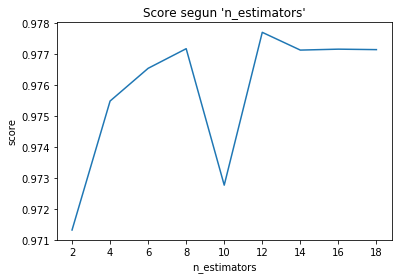

In [16]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators'")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

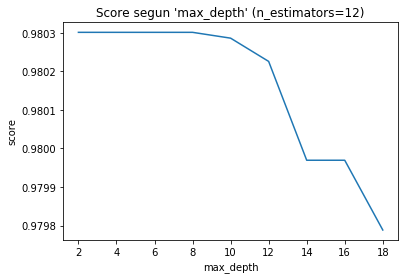

In [17]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(max_depth=n, n_estimators=12)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'max_depth' (n_estimators=12)")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

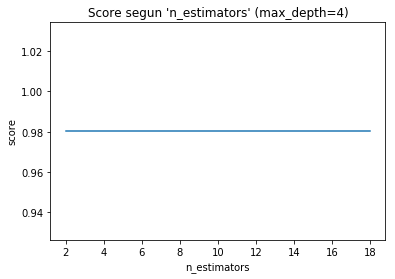

In [18]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(n_estimators=n, max_depth=4)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators' (max_depth=4)")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

Tras observar los gráficos de las pruebas se llega a las siguientes conclusiones (el último gráfico se ha realizado con el fin de unificar los resultados de las pruebas anteriores):

 - En la primera ejecución, el aumento en el **número de estimadores** (por defecto, todos los nodos se expanden al máximo) favorece el *score*, alcanzando un mínimo global en 2 y un mínimo local en 10. El mejor resultado se observa cuando este parámetro se sitúa en el valor 12, mientras que conforme aumenta el número, el *score* tiende a mantenerse constante. Por tanto, será el que se utilizará para la predicción final, puesto que cuanto mayor sea este número, el bosque se encontrará más poblado y la votación para llevar a cabo la decisión será más precisa.
 - En la segunda ejecución, el aumento en la **profundidad máxima** no varía hasta alcanzar una profundidad de 8, desde donde comienza a decrecer. Por tanto, en pos de generar un modelo no demasiado complejo, pero que sea capaz de realizar unas buenas predicciones, se escogerá el valor de 4 (ni demasiada profundidad ni demasiada poca).

In [19]:
# Creación del modelo final
model = RandomForestClassifier(n_jobs=-1, random_state=0)
model.set_params(max_depth=4, n_estimators=12)
model.fit(X_train, y_train)

print("'Score' con 12 estimadores y profundidad de 4: " + str('%.3f'%(model.score(X_test, y_test) * 100)) + "%")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


'Score' con 12 estimadores y profundidad de 4: 98.030%


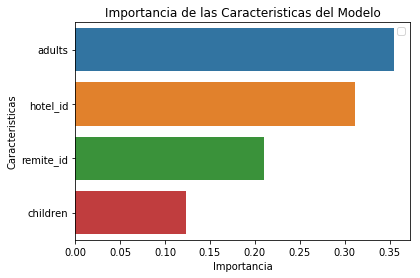

Relevancias de las características:


,Características,Random Forests
0,remite_id,0.210487
1,adults,0.354919
2,children,0.123061
3,hotel_id,0.311533


In [20]:
# Gráfico con las importancias de las características del modelo creado.
importancias_caract = pd.Series(model.feature_importances_, index=pred_caract).sort_values(ascending=False)

%matplotlib inline

sb.barplot(x=importancias_caract, y=importancias_caract.index)

plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las Caracteristicas del Modelo")
plt.legend()
plt.show()

# Relevancias de las características.
print ('Relevancias de las características:')
display(pd.DataFrame({'Características': pred_caract, 'Random Forests': model.feature_importances_}))

De acuerdo con los valores de las importancias de las diferentes características utilizadas para la creación del modelo, ***adults*** (número de adultos en la búsqueda) es la que más importancia acapara, seguida de ***hotel_id*** (hotel en el que se ha hecho click), ***remite_id*** (mercado geográfico del portal) y, por último, ***children*** (número de niños en la búsqueda).

## Comprobación Predicciones Modelo Original

A continuación, puesto que cabe la posibilidad de que el modelo tienda a "sobreaprender", se realizarán algunas pruebas con algunas muestras de datos aleatorias, de manera que se pueda comprobar (o no) la existencia de este fenómeno.

In [21]:
for prueba in range(3):
    
    aciertos_totales = 0
    aciertos_p0_t0 = 0
    aciertos_p1_t1 = 0
    
    fallos_totales = 0
    fallos_p0_t1 = 0
    fallos_p1_t0 = 0
    
    for iteracion in range(500):
        muestra = data.sample()
        muestra_caract = muestra[pred_caract]
        muestra_target = muestra[target].iloc[0][0]
        prediccion = model.predict(muestra_caract)

        if prediccion == muestra_target:
            aciertos_totales += 1
            
            if prediccion == 0:
                aciertos_p0_t0 += 1
            elif prediccion == 1:
                aciertos_p1_t1 += 1

        else:
            fallos_totales += 1
            
            if prediccion == 0 and muestra_target == 1:
                fallos_p0_t1 += 1
            elif prediccion == 1 and muestra_target == 0:
                fallos_p1_t0 += 1
        
    datos = {'Aciertos Totales': [aciertos_totales],
             'Predice 0 - Real 0': [aciertos_p0_t0],
             'Predice 1 - Real 1': [aciertos_p1_t1],
             'Fallos Totales': [fallos_totales],
             'Predice 0 - Real 1': [fallos_p0_t1],
             'Predice 1 - Real 0': [fallos_p1_t0]}
    
    resultados = pd.DataFrame(data=datos)
    print ("Resultados de las predicciones (iteración " + str(prueba) + "):")

    display(resultados)

Resultados de las predicciones (iteración 0):


,Aciertos Totales,Fallos Totales,Predice 0 - Real 0,Predice 0 - Real 1,Predice 1 - Real 0,Predice 1 - Real 1
0,491,9,491,9,0,0


Resultados de las predicciones (iteración 1):


,Aciertos Totales,Fallos Totales,Predice 0 - Real 0,Predice 0 - Real 1,Predice 1 - Real 0,Predice 1 - Real 1
0,490,10,490,10,0,0


Resultados de las predicciones (iteración 2):


,Aciertos Totales,Fallos Totales,Predice 0 - Real 0,Predice 0 - Real 1,Predice 1 - Real 0,Predice 1 - Real 1
0,484,16,484,16,0,0


## Reglas Árboles Modelo Original

In [22]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
for tree_idx, est in enumerate(model.estimators_):
    tree = est.tree_
    assert tree.value.shape[1] == 1 # no support for multi-output

    print('TREE: {}'.format(tree_idx))

    iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
    for node_idx, data in iterator:
        left, right, feature, th, value = data

        # left: index of left child (if any)
        # right: index of right child (if any)
        # feature: index of the feature to check
        # th: the threshold to compare against
        # value: values associated with classes            

        # for classifier, value is 0 except the index of the class to return
        class_idx = np.argmax(value[0])

        if left == -1 and right == -1:
            print('{} LEAF: return class={}'.format(node_idx, class_idx))
        else:
            print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))
            
    print("\n")

TREE: 0
0 NODE: if feature[0] < 109.5 then next=1 else next=16
1 NODE: if feature[1] < 1.5 then next=2 else next=9
2 NODE: if feature[3] < 1096.0 then next=3 else next=6
3 NODE: if feature[2] < 0.5 then next=4 else next=5
4 LEAF: return class=0
5 LEAF: return class=0
6 NODE: if feature[2] < 0.5 then next=7 else next=8
7 LEAF: return class=0
8 LEAF: return class=0
9 NODE: if feature[3] < 643.5 then next=10 else next=13
10 NODE: if feature[2] < 1.5 then next=11 else next=12
11 LEAF: return class=0
12 LEAF: return class=0
13 NODE: if feature[2] < 0.5 then next=14 else next=15
14 LEAF: return class=0
15 LEAF: return class=0
16 NODE: if feature[1] < 1.5 then next=17 else next=24
17 NODE: if feature[3] < 150960.0 then next=18 else next=21
18 NODE: if feature[3] < 150952.5 then next=19 else next=20
19 LEAF: return class=0
20 LEAF: return class=1
21 NODE: if feature[3] < 315384.0 then next=22 else next=23
22 LEAF: return class=0
23 LEAF: return class=0
24 NODE: if feature[1] < 3.5 then next=25

Tras las pruebas realizadas con tres iteraciones de 500 muestras cada una, se puede observar que el modelo predice muy bien cuándo no se va a realizar la reserva, mientras que suele fallar (dependiendo de la ejecución) mucho más a la hora de predecir el caso contrario. Esto puede deberse a que la cantidad de estos casos, como se ha mencionado anteriormente, es muy pequeña, no alcanzando el 2% del total de las muestras. Además, se han extraído las reglas de los árboles que conforman el modelo.

No obstante, a continuación se van a realizar otros modelos para llevar a cabo algunas pruebas más, de cara a mejorar el resultado de las predicciones de reservas ya sea balanceando las características, extrayendo nuevas características, etc.

# Prueba Modelo 2 (Balanceo)

Esta prueba estará basada en la anterior aunque, esta vez, realizando un balanceo de las características a la hora de generar el modelo, puesto que existe una gran diferencia en cuanto a la cantidad de muestras de cada clase a predecir. De igual manera, se realizará el estudio de la cantidad de estimadores y profundidad de los árboles, utilizando las mismas características para la construcción del modelo.

In [23]:
data = pd.read_csv("./clicks.csv")

# Selección de características a utilizar y 'target'
pred_caract = ['remite_id', 'adults', 'children', 'hotel_id']
target = ['sale']

# Extracción de las características que se utilizarán para la predicción.
X = data[pred_caract]

# Extracción de la característica a ser predicha (sale).
y = data[target]

In [24]:
fechas_train = ('2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04')
fechas_test = ('2016-04-05', '2016-04-06', '2016-04-07')

In [25]:
X_train = X.loc[data['date'].isin(fechas_train)]
X_test = X.loc[data['date'].isin(fechas_test)]
y_train = y.loc[data['date'].isin(fechas_train)]
y_test = y.loc[data['date'].isin(fechas_test)]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

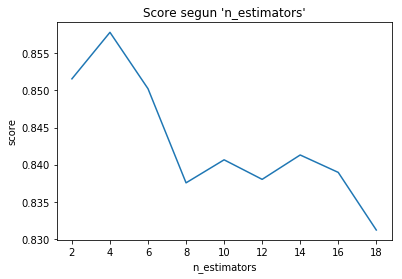

In [26]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators'")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

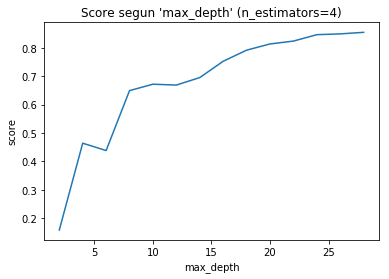

In [27]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=n, n_estimators=4)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'max_depth' (n_estimators=4)")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

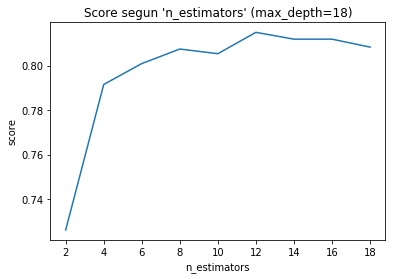

In [28]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 20, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
    model.set_params(max_depth=18, n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators' (max_depth=18)")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

Según los resultados obtenidos con el balanceo, se extrae una mejor predicción cuando la cantidad de estimadores (**n_estimators**) es de 12, mientras que la profundidad máxima (**max_depth**) es de 18.

In [29]:
# Creación del modelo final
model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
model.set_params(max_depth=18, n_estimators=12)
model.fit(X_train, y_train)

print("'Score' con 12 estimadores y profundidad de 18: " + str('%.3f'%(model.score(X_test, y_test) * 100)) + "%")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


'Score' con 12 estimadores y profundidad de 18: 81.503%


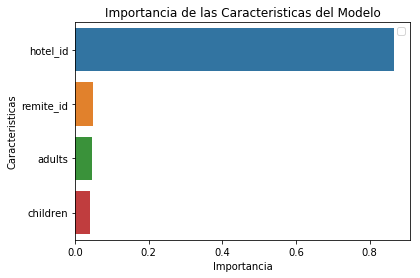

Relevancias de las características:


,Características,Random Forests
0,remite_id,0.047405
1,adults,0.046882
2,children,0.039357
3,hotel_id,0.866356


In [30]:
# Gráfico con las importancias de las características del modelo creado.
importancias_caract = pd.Series(model.feature_importances_, index=pred_caract).sort_values(ascending=False)

%matplotlib inline

sb.barplot(x=importancias_caract, y=importancias_caract.index)

plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las Caracteristicas del Modelo")
plt.legend()
plt.show()

# Relevancias de las características.
print ('Relevancias de las características:')
display(pd.DataFrame({'Características': pred_caract, 'Random Forests': model.feature_importances_}))

A priori, se observa que la calidad de la predicción con respecto al modelo original ha disminuido de 98.030% a 81.503%. Además, las importancias de las características bajan drásticamente, a excepción de *hotel_id*, que se mantiene alrededor del 85%.

## Comprobación Predicciones Modelo 2

In [31]:
for prueba in range(3):
    
    aciertos_totales = 0
    aciertos_p0_t0 = 0
    aciertos_p1_t1 = 0
    
    fallos_totales = 0
    fallos_p0_t1 = 0
    fallos_p1_t0 = 0
    
    for iteracion in range(500):
        muestra = data.sample()
        muestra_caract = muestra[pred_caract]
        muestra_target = muestra[target].iloc[0][0]
        prediccion = model.predict(muestra_caract)

        if prediccion == muestra_target:
            aciertos_totales += 1
            
            if prediccion == 0:
                aciertos_p0_t0 += 1
            elif prediccion == 1:
                aciertos_p1_t1 += 1

        else:
            fallos_totales += 1
            
            if prediccion == 0 and muestra_target == 1:
                fallos_p0_t1 += 1
            elif prediccion == 1 and muestra_target == 0:
                fallos_p1_t0 += 1
        
    datos = {'Aciertos Totales': [aciertos_totales],
             'Predice 0 - Real 0': [aciertos_p0_t0],
             'Predice 1 - Real 1': [aciertos_p1_t1],
             'Fallos Totales': [fallos_totales],
             'Predice 0 - Real 1': [fallos_p0_t1],
             'Predice 1 - Real 0': [fallos_p1_t0]}
    
    resultados = pd.DataFrame(data=datos)
    print ("Resultados de las predicciones (iteración " + str(prueba) + "):")

    display(resultados)

Resultados de las predicciones (iteración 0):


,Aciertos Totales,Fallos Totales,Predice 0 - Real 0,Predice 0 - Real 1,Predice 1 - Real 0,Predice 1 - Real 1
0,426,74,421,4,70,5


Resultados de las predicciones (iteración 1):


,Aciertos Totales,Fallos Totales,Predice 0 - Real 0,Predice 0 - Real 1,Predice 1 - Real 0,Predice 1 - Real 1
0,419,81,412,3,78,7


Resultados de las predicciones (iteración 2):


,Aciertos Totales,Fallos Totales,Predice 0 - Real 0,Predice 0 - Real 1,Predice 1 - Real 0,Predice 1 - Real 1
0,424,76,421,5,71,3


Observando los resultados de las predicciones, se observa que predice más casos cuando en realidad es un 1, aunque la cantidad de fallos totales ha crecido con respecto al modelo original.

## Reglas Árboles Modelo 2

In [32]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
for tree_idx, est in enumerate(model.estimators_):
    tree = est.tree_
    assert tree.value.shape[1] == 1 # no support for multi-output

    print('TREE: {}'.format(tree_idx))

    iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
    for node_idx, data in iterator:
        left, right, feature, th, value = data

        # left: index of left child (if any)
        # right: index of right child (if any)
        # feature: index of the feature to check
        # th: the threshold to compare against
        # value: values associated with classes            

        # for classifier, value is 0 except the index of the class to return
        class_idx = np.argmax(value[0])

        if left == -1 and right == -1:
            print('{} LEAF: return class={}'.format(node_idx, class_idx))
        else:
            print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))
            
    print("\n")

TREE: 0
0 NODE: if feature[0] < 109.5 then next=1 else next=1618
1 NODE: if feature[1] < 1.5 then next=2 else next=239
2 NODE: if feature[3] < 482.0 then next=3 else next=4
3 LEAF: return class=0
4 NODE: if feature[2] < 0.5 then next=5 else next=194
5 NODE: if feature[0] < 58.0 then next=6 else next=147
6 NODE: if feature[3] < 3476.0 then next=7 else next=72
7 NODE: if feature[3] < 1747.0 then next=8 else next=19
8 NODE: if feature[3] < 1386.0 then next=9 else next=18
9 NODE: if feature[3] < 1285.0 then next=10 else next=13
10 NODE: if feature[3] < 499.5 then next=11 else next=12
11 LEAF: return class=1
12 LEAF: return class=0
13 NODE: if feature[3] < 1323.0 then next=14 else next=17
14 NODE: if feature[3] < 1313.0 then next=15 else next=16
15 LEAF: return class=1
16 LEAF: return class=0
17 LEAF: return class=1
18 LEAF: return class=0
19 NODE: if feature[3] < 1770.5 then next=20 else next=21
20 LEAF: return class=1
21 NODE: if feature[3] < 2671.5 then next=22 else next=41
22 NODE: if f

944 LEAF: return class=0
945 LEAF: return class=1
946 LEAF: return class=0
947 NODE: if feature[3] < 152150.0 then next=948 else next=957
948 NODE: if feature[3] < 152120.5 then next=949 else next=956
949 NODE: if feature[3] < 152019.0 then next=950 else next=951
950 LEAF: return class=1
951 NODE: if feature[3] < 152098.5 then next=952 else next=953
952 LEAF: return class=0
953 NODE: if feature[3] < 152106.5 then next=954 else next=955
954 LEAF: return class=1
955 LEAF: return class=1
956 LEAF: return class=1
957 NODE: if feature[3] < 206283.5 then next=958 else next=1025
958 NODE: if feature[3] < 206280.0 then next=959 else next=1022
959 NODE: if feature[3] < 154617.5 then next=960 else next=979
960 NODE: if feature[3] < 154246.0 then next=961 else next=978
961 NODE: if feature[3] < 153856.5 then next=962 else next=971
962 NODE: if feature[3] < 153790.5 then next=963 else next=970
963 NODE: if feature[3] < 153537.0 then next=964 else next=967
964 NODE: if feature[3] < 152463.0 then ne

1214 LEAF: return class=0
1215 LEAF: return class=1
1216 LEAF: return class=0
1217 LEAF: return class=1
1218 LEAF: return class=0
1219 LEAF: return class=0
1220 NODE: if feature[3] < 219679.5 then next=1221 else next=1228
1221 NODE: if feature[3] < 219505.0 then next=1222 else next=1225
1222 NODE: if feature[1] < 3.5 then next=1223 else next=1224
1223 LEAF: return class=0
1224 LEAF: return class=1
1225 NODE: if feature[1] < 3.5 then next=1226 else next=1227
1226 LEAF: return class=1
1227 LEAF: return class=0
1228 NODE: if feature[3] < 221134.5 then next=1229 else next=1230
1229 LEAF: return class=0
1230 NODE: if feature[1] < 3.5 then next=1231 else next=1240
1231 NODE: if feature[3] < 226041.0 then next=1232 else next=1233
1232 LEAF: return class=0
1233 NODE: if feature[3] < 227296.5 then next=1234 else next=1237
1234 NODE: if feature[3] < 226294.5 then next=1235 else next=1236
1235 LEAF: return class=1
1236 LEAF: return class=0
1237 NODE: if feature[3] < 230959.0 then next=1238 else n

1861 LEAF: return class=0
1862 NODE: if feature[3] < 206365.5 then next=1863 else next=1866
1863 NODE: if feature[3] < 203721.0 then next=1864 else next=1865
1864 LEAF: return class=1
1865 LEAF: return class=0
1866 NODE: if feature[3] < 208243.5 then next=1867 else next=1870
1867 NODE: if feature[3] < 206464.0 then next=1868 else next=1869
1868 LEAF: return class=1
1869 LEAF: return class=0
1870 LEAF: return class=1
1871 NODE: if feature[3] < 225828.0 then next=1872 else next=1873
1872 LEAF: return class=0
1873 LEAF: return class=1
1874 LEAF: return class=0
1875 LEAF: return class=0
1876 NODE: if feature[3] < 222245.0 then next=1877 else next=1898
1877 NODE: if feature[0] < 223.0 then next=1878 else next=1897
1878 NODE: if feature[3] < 213034.5 then next=1879 else next=1884
1879 NODE: if feature[3] < 203742.0 then next=1880 else next=1883
1880 NODE: if feature[3] < 203714.5 then next=1881 else next=1882
1881 LEAF: return class=0
1882 LEAF: return class=1
1883 LEAF: return class=0
1884 

841 NODE: if feature[3] < 192168.0 then next=842 else next=843
842 LEAF: return class=1
843 LEAF: return class=1
844 LEAF: return class=1
845 NODE: if feature[3] < 207263.5 then next=846 else next=905
846 NODE: if feature[3] < 192752.0 then next=847 else next=848
847 LEAF: return class=0
848 NODE: if feature[3] < 199681.5 then next=849 else next=886
849 NODE: if feature[3] < 197277.5 then next=850 else next=869
850 NODE: if feature[3] < 196386.5 then next=851 else next=864
851 NODE: if feature[3] < 196355.5 then next=852 else next=863
852 NODE: if feature[3] < 193968.0 then next=853 else next=858
853 NODE: if feature[3] < 193822.0 then next=854 else next=857
854 NODE: if feature[3] < 192843.0 then next=855 else next=856
855 LEAF: return class=1
856 LEAF: return class=0
857 LEAF: return class=1
858 NODE: if feature[3] < 195686.5 then next=859 else next=860
859 LEAF: return class=0
860 NODE: if feature[3] < 195702.0 then next=861 else next=862
861 LEAF: return class=0
862 LEAF: return cl

1077 LEAF: return class=0
1078 NODE: if feature[3] < 204863.0 then next=1079 else next=1084
1079 NODE: if feature[3] < 204425.5 then next=1080 else next=1083
1080 NODE: if feature[3] < 204397.0 then next=1081 else next=1082
1081 LEAF: return class=1
1082 LEAF: return class=0
1083 LEAF: return class=1
1084 NODE: if feature[3] < 206447.0 then next=1085 else next=1086
1085 LEAF: return class=0
1086 LEAF: return class=1
1087 LEAF: return class=0
1088 NODE: if feature[3] < 291515.0 then next=1089 else next=1126
1089 NODE: if feature[3] < 259587.0 then next=1090 else next=1115
1090 NODE: if feature[3] < 251416.0 then next=1091 else next=1114
1091 NODE: if feature[3] < 244371.5 then next=1092 else next=1111
1092 NODE: if feature[3] < 243879.5 then next=1093 else next=1106
1093 NODE: if feature[3] < 240529.0 then next=1094 else next=1105
1094 NODE: if feature[3] < 231574.0 then next=1095 else next=1100
1095 NODE: if feature[3] < 226232.0 then next=1096 else next=1099
1096 NODE: if feature[3] <

1779 LEAF: return class=0
1780 NODE: if feature[2] < 0.5 then next=1781 else next=1782
1781 LEAF: return class=1
1782 LEAF: return class=0
1783 LEAF: return class=0
1784 LEAF: return class=0
1785 NODE: if feature[3] < 216092.0 then next=1786 else next=1797
1786 NODE: if feature[3] < 214404.5 then next=1787 else next=1788
1787 LEAF: return class=1
1788 NODE: if feature[2] < 1.5 then next=1789 else next=1790
1789 LEAF: return class=0
1790 NODE: if feature[1] < 3.0 then next=1791 else next=1796
1791 NODE: if feature[3] < 215946.0 then next=1792 else next=1795
1792 NODE: if feature[3] < 215531.5 then next=1793 else next=1794
1793 LEAF: return class=1
1794 LEAF: return class=0
1795 LEAF: return class=1
1796 LEAF: return class=0
1797 NODE: if feature[2] < 2.5 then next=1798 else next=1827
1798 NODE: if feature[3] < 221728.0 then next=1799 else next=1800
1799 LEAF: return class=0
1800 NODE: if feature[3] < 221789.0 then next=1801 else next=1806
1801 NODE: if feature[1] < 1.5 then next=1802 el

150 NODE: if feature[3] < 71937.0 then next=151 else next=152
151 LEAF: return class=0
152 LEAF: return class=1
153 NODE: if feature[3] < 48403.5 then next=154 else next=155
154 LEAF: return class=0
155 NODE: if feature[3] < 48427.0 then next=156 else next=157
156 LEAF: return class=1
157 NODE: if feature[3] < 48458.5 then next=158 else next=159
158 LEAF: return class=0
159 NODE: if feature[3] < 70407.0 then next=160 else next=163
160 NODE: if feature[3] < 48488.0 then next=161 else next=162
161 LEAF: return class=1
162 LEAF: return class=0
163 LEAF: return class=1
164 NODE: if feature[3] < 60161.0 then next=165 else next=166
165 LEAF: return class=0
166 LEAF: return class=1
167 LEAF: return class=0
168 NODE: if feature[3] < 192866.5 then next=169 else next=182
169 NODE: if feature[0] < 109.5 then next=170 else next=171
170 LEAF: return class=0
171 NODE: if feature[3] < 164102.0 then next=172 else next=181
172 NODE: if feature[3] < 160350.0 then next=173 else next=180
173 NODE: if feat

840 LEAF: return class=1
841 NODE: if feature[3] < 4359.5 then next=842 else next=845
842 NODE: if feature[3] < 4295.5 then next=843 else next=844
843 LEAF: return class=1
844 LEAF: return class=0
845 NODE: if feature[3] < 4360.5 then next=846 else next=847
846 LEAF: return class=1
847 LEAF: return class=0
848 LEAF: return class=0
849 LEAF: return class=0
850 NODE: if feature[3] < 4572.5 then next=851 else next=854
851 NODE: if feature[2] < 0.5 then next=852 else next=853
852 LEAF: return class=0
853 LEAF: return class=1
854 NODE: if feature[1] < 2.5 then next=855 else next=858
855 NODE: if feature[2] < 0.5 then next=856 else next=857
856 LEAF: return class=1
857 LEAF: return class=0
858 LEAF: return class=0
859 NODE: if feature[3] < 1158.0 then next=860 else next=873
860 NODE: if feature[3] < 1148.0 then next=861 else next=870
861 NODE: if feature[3] < 754.0 then next=862 else next=869
862 NODE: if feature[2] < 0.5 then next=863 else next=868
863 NODE: if feature[3] < 752.0 then next=

0 NODE: if feature[1] < 1.5 then next=1 else next=322
1 NODE: if feature[0] < 223.0 then next=2 else next=321
2 NODE: if feature[3] < 237.5 then next=3 else next=4
3 LEAF: return class=0
4 NODE: if feature[3] < 150955.5 then next=5 else next=164
5 NODE: if feature[3] < 1264.0 then next=6 else next=27
6 NODE: if feature[2] < 0.5 then next=7 else next=22
7 NODE: if feature[0] < 58.0 then next=8 else next=21
8 NODE: if feature[3] < 751.5 then next=9 else next=20
9 NODE: if feature[3] < 474.0 then next=10 else next=11
10 LEAF: return class=0
11 NODE: if feature[3] < 717.5 then next=12 else next=15
12 NODE: if feature[3] < 482.0 then next=13 else next=14
13 LEAF: return class=1
14 LEAF: return class=0
15 NODE: if feature[3] < 725.5 then next=16 else next=17
16 LEAF: return class=1
17 NODE: if feature[3] < 739.0 then next=18 else next=19
18 LEAF: return class=0
19 LEAF: return class=1
20 LEAF: return class=0
21 LEAF: return class=0
22 NODE: if feature[3] < 291.5 then next=23 else next=26
23 

795 NODE: if feature[3] < 9393.0 then next=796 else next=797
796 LEAF: return class=1
797 LEAF: return class=0
798 LEAF: return class=1
799 LEAF: return class=0
800 NODE: if feature[3] < 147906.0 then next=801 else next=812
801 NODE: if feature[3] < 48363.0 then next=802 else next=807
802 NODE: if feature[3] < 48351.5 then next=803 else next=806
803 NODE: if feature[3] < 40395.5 then next=804 else next=805
804 LEAF: return class=1
805 LEAF: return class=0
806 LEAF: return class=1
807 NODE: if feature[3] < 87392.5 then next=808 else next=809
808 LEAF: return class=0
809 NODE: if feature[3] < 110906.5 then next=810 else next=811
810 LEAF: return class=1
811 LEAF: return class=1
812 NODE: if feature[3] < 148368.0 then next=813 else next=814
813 LEAF: return class=0
814 NODE: if feature[3] < 148513.0 then next=815 else next=818
815 NODE: if feature[3] < 148397.5 then next=816 else next=817
816 LEAF: return class=1
817 LEAF: return class=1
818 LEAF: return class=0
819 NODE: if feature[3] < 

1168 NODE: if feature[3] < 168269.5 then next=1169 else next=1178
1169 NODE: if feature[3] < 168218.0 then next=1170 else next=1177
1170 NODE: if feature[3] < 167878.5 then next=1171 else next=1174
1171 NODE: if feature[3] < 167531.5 then next=1172 else next=1173
1172 LEAF: return class=1
1173 LEAF: return class=0
1174 NODE: if feature[3] < 167897.5 then next=1175 else next=1176
1175 LEAF: return class=1
1176 LEAF: return class=1
1177 LEAF: return class=0
1178 NODE: if feature[3] < 168440.0 then next=1179 else next=1186
1179 NODE: if feature[3] < 168287.0 then next=1180 else next=1183
1180 NODE: if feature[3] < 168280.0 then next=1181 else next=1182
1181 LEAF: return class=1
1182 LEAF: return class=1
1183 NODE: if feature[3] < 168363.0 then next=1184 else next=1185
1184 LEAF: return class=0
1185 LEAF: return class=1
1186 LEAF: return class=1
1187 NODE: if feature[3] < 172377.0 then next=1188 else next=1189
1188 LEAF: return class=0
1189 NODE: if feature[3] < 185233.0 then next=1190 els

1894 LEAF: return class=1
1895 LEAF: return class=1
1896 NODE: if feature[3] < 206447.0 then next=1897 else next=1898
1897 LEAF: return class=0
1898 LEAF: return class=1
1899 NODE: if feature[3] < 223248.0 then next=1900 else next=1901
1900 LEAF: return class=0
1901 NODE: if feature[3] < 233015.0 then next=1902 else next=1905
1902 NODE: if feature[3] < 226232.0 then next=1903 else next=1904
1903 LEAF: return class=1
1904 LEAF: return class=0
1905 NODE: if feature[3] < 234013.5 then next=1906 else next=1907
1906 LEAF: return class=1
1907 LEAF: return class=1
1908 NODE: if feature[3] < 221728.0 then next=1909 else next=1920
1909 NODE: if feature[3] < 198008.0 then next=1910 else next=1915
1910 NODE: if feature[3] < 191433.5 then next=1911 else next=1912
1911 LEAF: return class=0
1912 NODE: if feature[3] < 191596.0 then next=1913 else next=1914
1913 LEAF: return class=1
1914 LEAF: return class=0
1915 NODE: if feature[3] < 214161.5 then next=1916 else next=1917
1916 LEAF: return class=0
19

677 NODE: if feature[3] < 206282.5 then next=678 else next=681
678 NODE: if feature[3] < 206281.5 then next=679 else next=680
679 LEAF: return class=1
680 LEAF: return class=1
681 LEAF: return class=0
682 LEAF: return class=1
683 NODE: if feature[3] < 207263.5 then next=684 else next=689
684 NODE: if feature[3] < 206373.0 then next=685 else next=688
685 NODE: if feature[3] < 206351.5 then next=686 else next=687
686 LEAF: return class=0
687 LEAF: return class=0
688 LEAF: return class=0
689 NODE: if feature[3] < 207272.0 then next=690 else next=691
690 LEAF: return class=0
691 LEAF: return class=0
692 NODE: if feature[3] < 209934.0 then next=693 else next=716
693 NODE: if feature[3] < 208022.0 then next=694 else next=703
694 NODE: if feature[3] < 207857.5 then next=695 else next=698
695 NODE: if feature[3] < 207571.0 then next=696 else next=697
696 LEAF: return class=1
697 LEAF: return class=0
698 NODE: if feature[3] < 208004.0 then next=699 else next=702
699 NODE: if feature[3] < 207929

1629 LEAF: return class=1
1630 LEAF: return class=0
1631 NODE: if feature[0] < 316.5 then next=1632 else next=1681
1632 NODE: if feature[0] < 109.5 then next=1633 else next=1646
1633 NODE: if feature[3] < 78664.0 then next=1634 else next=1635
1634 LEAF: return class=0
1635 NODE: if feature[1] < 3.5 then next=1636 else next=1645
1636 NODE: if feature[3] < 78933.5 then next=1637 else next=1638
1637 LEAF: return class=1
1638 NODE: if feature[3] < 221449.0 then next=1639 else next=1642
1639 NODE: if feature[1] < 2.5 then next=1640 else next=1641
1640 LEAF: return class=0
1641 LEAF: return class=0
1642 NODE: if feature[3] < 223607.0 then next=1643 else next=1644
1643 LEAF: return class=1
1644 LEAF: return class=0
1645 LEAF: return class=0
1646 NODE: if feature[3] < 148571.5 then next=1647 else next=1666
1647 NODE: if feature[3] < 110499.0 then next=1648 else next=1657
1648 NODE: if feature[3] < 80410.0 then next=1649 else next=1650
1649 LEAF: return class=0
1650 NODE: if feature[3] < 81090.

585 NODE: if feature[3] < 1879.5 then next=586 else next=587
586 LEAF: return class=1
587 LEAF: return class=1
588 LEAF: return class=0
589 LEAF: return class=1
590 LEAF: return class=0
591 NODE: if feature[3] < 2904.0 then next=592 else next=593
592 LEAF: return class=1
593 LEAF: return class=1
594 NODE: if feature[3] < 3602.0 then next=595 else next=596
595 LEAF: return class=0
596 NODE: if feature[3] < 3669.0 then next=597 else next=598
597 LEAF: return class=1
598 NODE: if feature[3] < 3853.5 then next=599 else next=600
599 LEAF: return class=0
600 NODE: if feature[3] < 3857.5 then next=601 else next=602
601 LEAF: return class=1
602 NODE: if feature[3] < 4212.0 then next=603 else next=604
603 LEAF: return class=0
604 NODE: if feature[3] < 4214.5 then next=605 else next=606
605 LEAF: return class=1
606 LEAF: return class=0
607 NODE: if feature[3] < 4295.5 then next=608 else next=629
608 NODE: if feature[3] < 4262.0 then next=609 else next=626
609 NODE: if feature[3] < 4228.5 then ne

1607 NODE: if feature[3] < 270396.0 then next=1608 else next=1609
1608 LEAF: return class=1
1609 LEAF: return class=0
1610 LEAF: return class=1
1611 LEAF: return class=0
1612 NODE: if feature[2] < 1.5 then next=1613 else next=1614
1613 LEAF: return class=0
1614 NODE: if feature[2] < 2.5 then next=1615 else next=1618
1615 NODE: if feature[3] < 341746.0 then next=1616 else next=1617
1616 LEAF: return class=0
1617 LEAF: return class=1
1618 LEAF: return class=0
1619 NODE: if feature[3] < 188743.5 then next=1620 else next=1621
1620 LEAF: return class=0
1621 NODE: if feature[3] < 251888.0 then next=1622 else next=1647
1622 NODE: if feature[3] < 250554.5 then next=1623 else next=1646
1623 NODE: if feature[3] < 221910.0 then next=1624 else next=1645
1624 NODE: if feature[2] < 0.5 then next=1625 else next=1634
1625 NODE: if feature[0] < 58.0 then next=1626 else next=1633
1626 NODE: if feature[3] < 218949.5 then next=1627 else next=1628
1627 LEAF: return class=0
1628 NODE: if feature[3] < 220632

676 LEAF: return class=0
677 NODE: if feature[3] < 162498.0 then next=678 else next=735
678 NODE: if feature[3] < 150476.5 then next=679 else next=696
679 NODE: if feature[3] < 150474.0 then next=680 else next=693
680 NODE: if feature[3] < 150295.0 then next=681 else next=686
681 NODE: if feature[3] < 150292.5 then next=682 else next=685
682 NODE: if feature[3] < 149085.5 then next=683 else next=684
683 LEAF: return class=1
684 LEAF: return class=0
685 LEAF: return class=1
686 NODE: if feature[3] < 150344.5 then next=687 else next=688
687 LEAF: return class=0
688 NODE: if feature[3] < 150349.0 then next=689 else next=690
689 LEAF: return class=1
690 NODE: if feature[3] < 150389.5 then next=691 else next=692
691 LEAF: return class=0
692 LEAF: return class=1
693 NODE: if feature[3] < 150475.5 then next=694 else next=695
694 LEAF: return class=1
695 LEAF: return class=1
696 NODE: if feature[3] < 150969.0 then next=697 else next=710
697 NODE: if feature[3] < 150508.5 then next=698 else nex

1692 LEAF: return class=0
1693 LEAF: return class=0
1694 NODE: if feature[2] < 0.5 then next=1695 else next=1714
1695 NODE: if feature[3] < 110096.5 then next=1696 else next=1707
1696 NODE: if feature[1] < 2.5 then next=1697 else next=1706
1697 NODE: if feature[3] < 71722.5 then next=1698 else next=1703
1698 NODE: if feature[3] < 48572.5 then next=1699 else next=1702
1699 NODE: if feature[3] < 48548.5 then next=1700 else next=1701
1700 LEAF: return class=0
1701 LEAF: return class=1
1702 LEAF: return class=0
1703 NODE: if feature[3] < 73058.5 then next=1704 else next=1705
1704 LEAF: return class=1
1705 LEAF: return class=0
1706 LEAF: return class=0
1707 NODE: if feature[3] < 110521.0 then next=1708 else next=1713
1708 NODE: if feature[3] < 110110.0 then next=1709 else next=1712
1709 NODE: if feature[1] < 2.5 then next=1710 else next=1711
1710 LEAF: return class=1
1711 LEAF: return class=0
1712 LEAF: return class=0
1713 LEAF: return class=1
1714 NODE: if feature[2] < 1.5 then next=1715 e

606 LEAF: return class=1
607 LEAF: return class=0
608 LEAF: return class=1
609 LEAF: return class=0
610 NODE: if feature[3] < 206282.5 then next=611 else next=614
611 NODE: if feature[3] < 206281.5 then next=612 else next=613
612 LEAF: return class=1
613 LEAF: return class=1
614 NODE: if feature[3] < 206317.5 then next=615 else next=616
615 LEAF: return class=0
616 LEAF: return class=1
617 NODE: if feature[3] < 206373.0 then next=618 else next=621
618 NODE: if feature[3] < 206351.5 then next=619 else next=620
619 LEAF: return class=0
620 LEAF: return class=0
621 LEAF: return class=0
622 NODE: if feature[3] < 209765.5 then next=623 else next=644
623 NODE: if feature[3] < 207857.5 then next=624 else next=627
624 NODE: if feature[3] < 207265.0 then next=625 else next=626
625 LEAF: return class=1
626 LEAF: return class=0
627 NODE: if feature[3] < 208165.0 then next=628 else next=633
628 NODE: if feature[3] < 208004.0 then next=629 else next=632
629 NODE: if feature[3] < 207929.5 then next=

902 NODE: if feature[3] < 188835.5 then next=903 else next=908
903 NODE: if feature[3] < 167041.0 then next=904 else next=907
904 NODE: if feature[3] < 166954.0 then next=905 else next=906
905 LEAF: return class=0
906 LEAF: return class=1
907 LEAF: return class=0
908 LEAF: return class=1
909 LEAF: return class=0
910 LEAF: return class=1
911 LEAF: return class=0
912 LEAF: return class=1
913 LEAF: return class=0
914 LEAF: return class=0
915 NODE: if feature[3] < 223.0 then next=916 else next=939
916 NODE: if feature[1] < 2.5 then next=917 else next=938
917 NODE: if feature[3] < 124.5 then next=918 else next=937
918 NODE: if feature[2] < 1.5 then next=919 else next=920
919 LEAF: return class=0
920 NODE: if feature[2] < 2.5 then next=921 else next=936
921 NODE: if feature[3] < 123.5 then next=922 else next=935
922 NODE: if feature[3] < 91.5 then next=923 else next=926
923 NODE: if feature[3] < 80.5 then next=924 else next=925
924 LEAF: return class=0
925 LEAF: return class=1
926 NODE: if f

1671 LEAF: return class=0
1672 NODE: if feature[3] < 214256.5 then next=1673 else next=1674
1673 LEAF: return class=0
1674 NODE: if feature[0] < 109.5 then next=1675 else next=1676
1675 LEAF: return class=0
1676 NODE: if feature[1] < 2.5 then next=1677 else next=1680
1677 NODE: if feature[3] < 214404.5 then next=1678 else next=1679
1678 LEAF: return class=1
1679 LEAF: return class=0
1680 LEAF: return class=0
1681 NODE: if feature[1] < 2.5 then next=1682 else next=1725
1682 NODE: if feature[0] < 109.5 then next=1683 else next=1698
1683 NODE: if feature[3] < 364768.5 then next=1684 else next=1697
1684 NODE: if feature[3] < 221671.5 then next=1685 else next=1686
1685 LEAF: return class=1
1686 NODE: if feature[3] < 360100.5 then next=1687 else next=1694
1687 NODE: if feature[3] < 357863.5 then next=1688 else next=1693
1688 NODE: if feature[3] < 306085.0 then next=1689 else next=1692
1689 NODE: if feature[3] < 305834.5 then next=1690 else next=1691
1690 LEAF: return class=1
1691 LEAF: retur

661 LEAF: return class=1
662 LEAF: return class=0
663 LEAF: return class=1
664 LEAF: return class=0
665 NODE: if feature[3] < 36174.0 then next=666 else next=697
666 NODE: if feature[3] < 32606.0 then next=667 else next=688
667 NODE: if feature[3] < 24121.0 then next=668 else next=681
668 NODE: if feature[3] < 9796.5 then next=669 else next=676
669 NODE: if feature[3] < 4405.0 then next=670 else next=673
670 NODE: if feature[3] < 4308.0 then next=671 else next=672
671 LEAF: return class=1
672 LEAF: return class=1
673 NODE: if feature[3] < 4931.0 then next=674 else next=675
674 LEAF: return class=0
675 LEAF: return class=1
676 NODE: if feature[3] < 23936.0 then next=677 else next=680
677 NODE: if feature[3] < 22549.5 then next=678 else next=679
678 LEAF: return class=1
679 LEAF: return class=0
680 LEAF: return class=1
681 NODE: if feature[3] < 26482.0 then next=682 else next=683
682 LEAF: return class=0
683 NODE: if feature[3] < 28707.0 then next=684 else next=687
684 NODE: if feature[3

912 NODE: if feature[3] < 343.0 then next=913 else next=918
913 NODE: if feature[3] < 222.5 then next=914 else next=915
914 LEAF: return class=0
915 NODE: if feature[3] < 236.0 then next=916 else next=917
916 LEAF: return class=1
917 LEAF: return class=1
918 NODE: if feature[3] < 1722.5 then next=919 else next=920
919 LEAF: return class=0
920 NODE: if feature[3] < 2368.5 then next=921 else next=922
921 LEAF: return class=1
922 LEAF: return class=0
923 NODE: if feature[3] < 4263.0 then next=924 else next=931
924 NODE: if feature[3] < 4254.5 then next=925 else next=928
925 NODE: if feature[3] < 4240.5 then next=926 else next=927
926 LEAF: return class=1
927 LEAF: return class=0
928 NODE: if feature[3] < 4258.0 then next=929 else next=930
929 LEAF: return class=1
930 LEAF: return class=1
931 NODE: if feature[3] < 4267.5 then next=932 else next=933
932 LEAF: return class=0
933 NODE: if feature[3] < 4272.5 then next=934 else next=935
934 LEAF: return class=1
935 LEAF: return class=1
936 NOD

1620 LEAF: return class=0
1621 LEAF: return class=0
1622 LEAF: return class=0
1623 LEAF: return class=0
1624 NODE: if feature[0] < 223.0 then next=1625 else next=2082
1625 NODE: if feature[3] < 8921.0 then next=1626 else next=1653
1626 NODE: if feature[3] < 757.0 then next=1627 else next=1642
1627 NODE: if feature[2] < 1.5 then next=1628 else next=1637
1628 NODE: if feature[2] < 0.5 then next=1629 else next=1636
1629 NODE: if feature[0] < 109.5 then next=1630 else next=1635
1630 NODE: if feature[3] < 751.5 then next=1631 else next=1632
1631 LEAF: return class=0
1632 NODE: if feature[1] < 2.5 then next=1633 else next=1634
1633 LEAF: return class=1
1634 LEAF: return class=0
1635 LEAF: return class=0
1636 LEAF: return class=0
1637 NODE: if feature[3] < 346.5 then next=1638 else next=1639
1638 LEAF: return class=0
1639 NODE: if feature[3] < 348.0 then next=1640 else next=1641
1640 LEAF: return class=1
1641 LEAF: return class=0
1642 NODE: if feature[0] < 109.5 then next=1643 else next=1644


1808 LEAF: return class=1
1809 LEAF: return class=0
1810 LEAF: return class=1
1811 NODE: if feature[3] < 259555.0 then next=1812 else next=1821
1812 NODE: if feature[3] < 244029.0 then next=1813 else next=1816
1813 NODE: if feature[3] < 243879.5 then next=1814 else next=1815
1814 LEAF: return class=0
1815 LEAF: return class=1
1816 NODE: if feature[3] < 255572.5 then next=1817 else next=1818
1817 LEAF: return class=0
1818 NODE: if feature[3] < 255841.5 then next=1819 else next=1820
1819 LEAF: return class=1
1820 LEAF: return class=0
1821 NODE: if feature[3] < 291162.0 then next=1822 else next=1839
1822 NODE: if feature[3] < 290901.0 then next=1823 else next=1838
1823 NODE: if feature[3] < 268433.5 then next=1824 else next=1833
1824 NODE: if feature[3] < 262735.0 then next=1825 else next=1830
1825 NODE: if feature[3] < 260534.5 then next=1826 else next=1829
1826 NODE: if feature[3] < 259919.0 then next=1827 else next=1828
1827 LEAF: return class=1
1828 LEAF: return class=0
1829 LEAF: ret

435 LEAF: return class=1
436 LEAF: return class=0
437 NODE: if feature[2] < 0.5 then next=438 else next=439
438 LEAF: return class=0
439 NODE: if feature[3] < 236.0 then next=440 else next=443
440 NODE: if feature[3] < 214.0 then next=441 else next=442
441 LEAF: return class=0
442 LEAF: return class=1
443 LEAF: return class=0
444 NODE: if feature[3] < 1775.0 then next=445 else next=510
445 NODE: if feature[1] < 3.5 then next=446 else next=509
446 NODE: if feature[3] < 1531.0 then next=447 else next=476
447 NODE: if feature[2] < 0.5 then next=448 else next=463
448 NODE: if feature[3] < 1503.0 then next=449 else next=462
449 NODE: if feature[3] < 1491.0 then next=450 else next=457
450 NODE: if feature[1] < 2.5 then next=451 else next=456
451 NODE: if feature[3] < 1488.0 then next=452 else next=455
452 NODE: if feature[3] < 1465.0 then next=453 else next=454
453 LEAF: return class=1
454 LEAF: return class=0
455 LEAF: return class=1
456 LEAF: return class=0
457 NODE: if feature[1] < 2.5 th

672 LEAF: return class=0
673 LEAF: return class=1
674 LEAF: return class=0
675 LEAF: return class=1
676 NODE: if feature[3] < 148533.5 then next=677 else next=706
677 NODE: if feature[1] < 2.5 then next=678 else next=705
678 NODE: if feature[2] < 0.5 then next=679 else next=700
679 NODE: if feature[3] < 148513.0 then next=680 else next=699
680 NODE: if feature[3] < 148506.0 then next=681 else next=698
681 NODE: if feature[3] < 148467.5 then next=682 else next=697
682 NODE: if feature[3] < 148455.0 then next=683 else next=692
683 NODE: if feature[3] < 148432.5 then next=684 else next=691
684 NODE: if feature[3] < 148423.0 then next=685 else next=688
685 NODE: if feature[3] < 148402.0 then next=686 else next=687
686 LEAF: return class=1
687 LEAF: return class=0
688 NODE: if feature[3] < 148425.0 then next=689 else next=690
689 LEAF: return class=1
690 LEAF: return class=1
691 LEAF: return class=0
692 NODE: if feature[3] < 148458.5 then next=693 else next=694
693 LEAF: return class=1
694 

1412 NODE: if feature[3] < 226388.5 then next=1413 else next=1424
1413 NODE: if feature[3] < 225339.0 then next=1414 else next=1419
1414 NODE: if feature[3] < 224135.0 then next=1415 else next=1418
1415 NODE: if feature[3] < 223899.5 then next=1416 else next=1417
1416 LEAF: return class=0
1417 LEAF: return class=0
1418 LEAF: return class=0
1419 NODE: if feature[3] < 225438.5 then next=1420 else next=1421
1420 LEAF: return class=1
1421 NODE: if feature[3] < 226072.0 then next=1422 else next=1423
1422 LEAF: return class=0
1423 LEAF: return class=1
1424 LEAF: return class=0
1425 NODE: if feature[3] < 234013.5 then next=1426 else next=1427
1426 LEAF: return class=1
1427 NODE: if feature[3] < 234339.5 then next=1428 else next=1429
1428 LEAF: return class=0
1429 LEAF: return class=1
1430 LEAF: return class=0
1431 NODE: if feature[3] < 244209.5 then next=1432 else next=1435
1432 NODE: if feature[3] < 244029.0 then next=1433 else next=1434
1433 LEAF: return class=1
1434 LEAF: return class=0
14

339 NODE: if feature[3] < 280.5 then next=340 else next=343
340 NODE: if feature[3] < 247.5 then next=341 else next=342
341 LEAF: return class=0
342 LEAF: return class=0
343 NODE: if feature[3] < 300.5 then next=344 else next=345
344 LEAF: return class=1
345 LEAF: return class=0
346 LEAF: return class=0
347 NODE: if feature[3] < 486.0 then next=348 else next=355
348 NODE: if feature[3] < 480.0 then next=349 else next=354
349 NODE: if feature[3] < 439.0 then next=350 else next=351
350 LEAF: return class=1
351 NODE: if feature[3] < 472.5 then next=352 else next=353
352 LEAF: return class=0
353 LEAF: return class=1
354 LEAF: return class=0
355 NODE: if feature[3] < 497.5 then next=356 else next=357
356 LEAF: return class=1
357 LEAF: return class=1
358 LEAF: return class=0
359 NODE: if feature[3] < 247.5 then next=360 else next=365
360 NODE: if feature[3] < 236.5 then next=361 else next=362
361 LEAF: return class=1
362 NODE: if feature[3] < 245.5 then next=363 else next=364
363 LEAF: retur

1295 LEAF: return class=0
1296 LEAF: return class=0
1297 NODE: if feature[2] < 2.5 then next=1298 else next=1307
1298 NODE: if feature[3] < 150992.5 then next=1299 else next=1306
1299 NODE: if feature[3] < 21611.5 then next=1300 else next=1301
1300 LEAF: return class=0
1301 NODE: if feature[3] < 150970.5 then next=1302 else next=1305
1302 NODE: if feature[3] < 42724.0 then next=1303 else next=1304
1303 LEAF: return class=1
1304 LEAF: return class=0
1305 LEAF: return class=1
1306 LEAF: return class=0
1307 LEAF: return class=0
1308 NODE: if feature[2] < 2.5 then next=1309 else next=1364
1309 NODE: if feature[3] < 186493.5 then next=1310 else next=1315
1310 NODE: if feature[3] < 186291.5 then next=1311 else next=1312
1311 LEAF: return class=1
1312 NODE: if feature[3] < 186479.0 then next=1313 else next=1314
1313 LEAF: return class=0
1314 LEAF: return class=1
1315 NODE: if feature[3] < 360972.5 then next=1316 else next=1363
1316 NODE: if feature[3] < 299447.5 then next=1317 else next=1354


591 LEAF: return class=1
592 LEAF: return class=0
593 NODE: if feature[3] < 3116.5 then next=594 else next=599
594 NODE: if feature[3] < 3000.0 then next=595 else next=596
595 LEAF: return class=1
596 NODE: if feature[3] < 3105.0 then next=597 else next=598
597 LEAF: return class=0
598 LEAF: return class=1
599 NODE: if feature[3] < 3313.5 then next=600 else next=605
600 NODE: if feature[3] < 3235.0 then next=601 else next=604
601 NODE: if feature[3] < 3218.5 then next=602 else next=603
602 LEAF: return class=0
603 LEAF: return class=1
604 LEAF: return class=0
605 NODE: if feature[3] < 3397.0 then next=606 else next=609
606 NODE: if feature[3] < 3343.5 then next=607 else next=608
607 LEAF: return class=1
608 LEAF: return class=1
609 LEAF: return class=1
610 NODE: if feature[3] < 4268.0 then next=611 else next=644
611 NODE: if feature[3] < 4253.5 then next=612 else next=643
612 NODE: if feature[3] < 3703.0 then next=613 else next=624
613 NODE: if feature[3] < 3701.5 then next=614 else ne

1470 NODE: if feature[3] < 162494.5 then next=1471 else next=1484
1471 NODE: if feature[3] < 37993.5 then next=1472 else next=1477
1472 NODE: if feature[3] < 9459.5 then next=1473 else next=1476
1473 NODE: if feature[3] < 8491.0 then next=1474 else next=1475
1474 LEAF: return class=0
1475 LEAF: return class=1
1476 LEAF: return class=0
1477 NODE: if feature[3] < 148513.0 then next=1478 else next=1481
1478 NODE: if feature[3] < 101950.0 then next=1479 else next=1480
1479 LEAF: return class=1
1480 LEAF: return class=1
1481 NODE: if feature[3] < 150844.5 then next=1482 else next=1483
1482 LEAF: return class=0
1483 LEAF: return class=1
1484 LEAF: return class=0
1485 NODE: if feature[3] < 164024.5 then next=1486 else next=1487
1486 LEAF: return class=1
1487 NODE: if feature[3] < 166989.0 then next=1488 else next=1493
1488 NODE: if feature[3] < 165486.0 then next=1489 else next=1492
1489 NODE: if feature[3] < 165265.0 then next=1490 else next=1491
1490 LEAF: return class=1
1491 LEAF: return c

# Prueba Modelo 3 (Extracción Características)
Este tercer modelo se basará en la extracción de algunas de las características deducibles de los datos originales. Para la construcción del modelo, en este caso, se van a extraer las características *weekday*/*weekend* (si la búsqueda se realiza entre semana o en fin de semana) y *season_checkin* (estación del año del *checkin*. Para determinar la estación se utilizará una división simplificada: abril-junio (primavera), julio-septiembre (verano), octubre-diciembre (otoño), enero-marzo (invierno).

In [33]:
data = pd.read_csv("./clicks.csv")
data['season_checkin'] = pd.DatetimeIndex(data['checkin']).month.map({1: 1, 2: 1, 3: 1,
                                                                        4: 2, 5: 2, 6: 2,
                                                                        7: 3, 8: 3, 9: 3,
                                                                        10: 4, 11: 4, 12: 4})
data['weekend'] = data['date'].map({'2016-04-01': 0,
                                   '2016-04-02': 0,
                                   '2016-04-03': 0,
                                   '2016-04-04': 0,
                                   '2016-04-05': 0,
                                   '2016-04-06': 1,
                                   '2016-04-07': 1})

In [34]:
# Selección de características a utilizar y 'target'
pred_caract = ['remite_id', 'adults', 'children', 'hotel_id', 'season_checkin', 'weekend']
target = ['sale']

# Extracción de las características que se utilizarán para la predicción.
X = data[pred_caract]

# Extracción de la característica a ser predicha (sale).
y = data[target]

In [35]:
fechas_train = ('2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04')
fechas_test = ('2016-04-05', '2016-04-06', '2016-04-07')

In [36]:
X_train = X.loc[data['date'].isin(fechas_train)]
X_test = X.loc[data['date'].isin(fechas_test)]
y_train = y.loc[data['date'].isin(fechas_train)]
y_test = y.loc[data['date'].isin(fechas_test)]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

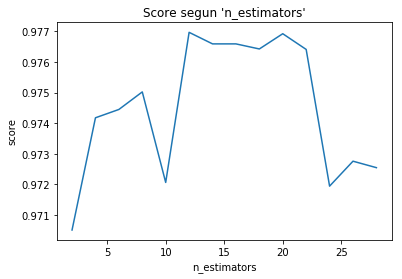

In [37]:
# Probar diferentes cantidades de estimadores (n_estimators)
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators'")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

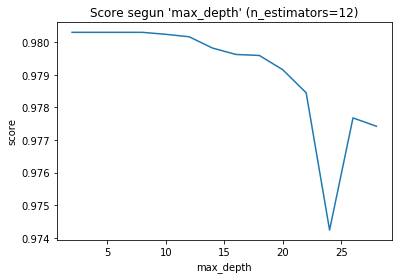

In [38]:
# Probar con diferentes profundidades de árbol.
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(max_depth=n, n_estimators=12)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'max_depth' (n_estimators=12)")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(estimators, scores)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

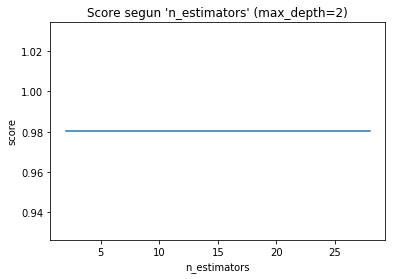

In [39]:
# Probar con diferentes cantidades de estimadores (n_estimators) de árbol.
estimators = np.arange(2, 30, 2)
scores = []

for n in estimators:
    model = RandomForestClassifier(n_jobs=-1, random_state=0)
    model.set_params(max_depth=2, n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Score segun 'n_estimators' (max_depth=2)")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators, scores)

In [40]:
# Creación del modelo final
model = RandomForestClassifier(n_jobs=-1, random_state=0)
model.set_params(n_estimators=12, max_depth=2)
model.fit(X_train, y_train)

print("'Score' con 12 estimadores y profundidad de 2: " + str('%.3f'%(model.score(X_test, y_test) * 100)) + "%")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


'Score' con 12 estimadores y profundidad de 2: 98.030%


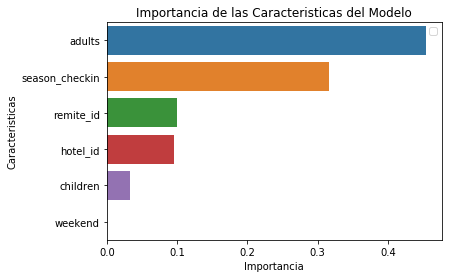

Relevancias de las características:


,Características,Random Forests
0,remite_id,0.100585
1,adults,0.453820
2,children,0.033348
3,hotel_id,0.095529
4,season_checkin,0.316718
5,weekend,0.000000


In [41]:
# Gráfico con las importancias de las características del modelo creado.
importancias_caract = pd.Series(model.feature_importances_, index=pred_caract).sort_values(ascending=False)

%matplotlib inline

sb.barplot(x=importancias_caract, y=importancias_caract.index)

plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las Caracteristicas del Modelo")
plt.legend()
plt.show()

# Relevancias de las características.
print ('Relevancias de las características:')
display(pd.DataFrame({'Características': pred_caract, 'Random Forests': model.feature_importances_}))

Según las importancias de las características, aunque se ha extraído si la búsqueda se realiza o no en fin de semana, esta no tiene ninguna relevancia en cuanto a la creación del modelo.

## Comprobación Predicciones Modelo 3

In [42]:
for prueba in range(3):
    
    aciertos_totales = 0
    aciertos_p0_t0 = 0
    aciertos_p1_t1 = 0
    
    fallos_totales = 0
    fallos_p0_t1 = 0
    fallos_p1_t0 = 0
    
    for iteracion in range(500):
        muestra = data.sample()
        muestra_caract = muestra[pred_caract]
        muestra_target = muestra[target].iloc[0][0]
        prediccion = model.predict(muestra_caract)

        if prediccion == muestra_target:
            aciertos_totales += 1
            
            if prediccion == 0:
                aciertos_p0_t0 += 1
            elif prediccion == 1:
                aciertos_p1_t1 += 1

        else:
            fallos_totales += 1
            
            if prediccion == 0 and muestra_target == 1:
                fallos_p0_t1 += 1
            elif prediccion == 1 and muestra_target == 0:
                fallos_p1_t0 += 1
        
    datos = {'Aciertos Totales': [aciertos_totales],
             'Predice 0 - Real 0': [aciertos_p0_t0],
             'Predice 1 - Real 1': [aciertos_p1_t1],
             'Fallos Totales': [fallos_totales],
             'Predice 0 - Real 1': [fallos_p0_t1],
             'Predice 1 - Real 0': [fallos_p1_t0]}
    
    resultados = pd.DataFrame(data=datos)
    print ("Resultados de las predicciones (iteración " + str(prueba) + "):")

    display(resultados)

Resultados de las predicciones (iteración 0):


,Aciertos Totales,Fallos Totales,Predice 0 - Real 0,Predice 0 - Real 1,Predice 1 - Real 0,Predice 1 - Real 1
0,492,8,492,8,0,0


Resultados de las predicciones (iteración 1):


,Aciertos Totales,Fallos Totales,Predice 0 - Real 0,Predice 0 - Real 1,Predice 1 - Real 0,Predice 1 - Real 1
0,485,15,485,15,0,0


Resultados de las predicciones (iteración 2):


,Aciertos Totales,Fallos Totales,Predice 0 - Real 0,Predice 0 - Real 1,Predice 1 - Real 0,Predice 1 - Real 1
0,491,9,491,9,0,0


In [43]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
for tree_idx, est in enumerate(model.estimators_):
    tree = est.tree_
    assert tree.value.shape[1] == 1 # no support for multi-output

    print('TREE: {}'.format(tree_idx))

    iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
    for node_idx, data in iterator:
        left, right, feature, th, value = data

        # left: index of left child (if any)
        # right: index of right child (if any)
        # feature: index of the feature to check
        # th: the threshold to compare against
        # value: values associated with classes            

        # for classifier, value is 0 except the index of the class to return
        class_idx = np.argmax(value[0])

        if left == -1 and right == -1:
            print('{} LEAF: return class={}'.format(node_idx, class_idx))
        else:
            print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))
            
    print("\n")

TREE: 0
0 NODE: if feature[0] < 109.5 then next=1 else next=4
1 NODE: if feature[1] < 1.5 then next=2 else next=3
2 LEAF: return class=0
3 LEAF: return class=0
4 NODE: if feature[4] < 3.5 then next=5 else next=6
5 LEAF: return class=0
6 LEAF: return class=0


TREE: 1
0 NODE: if feature[3] < 4599.0 then next=1 else next=4
1 NODE: if feature[1] < 1.5 then next=2 else next=3
2 LEAF: return class=0
3 LEAF: return class=0
4 NODE: if feature[4] < 2.5 then next=5 else next=6
5 LEAF: return class=0
6 LEAF: return class=0


TREE: 2
0 NODE: if feature[3] < 4574.5 then next=1 else next=4
1 NODE: if feature[3] < 482.0 then next=2 else next=3
2 LEAF: return class=0
3 LEAF: return class=0
4 NODE: if feature[1] < 1.5 then next=5 else next=6
5 LEAF: return class=0
6 LEAF: return class=0


TREE: 3
0 NODE: if feature[4] < 2.5 then next=1 else next=4
1 NODE: if feature[4] < 1.5 then next=2 else next=3
2 LEAF: return class=0
3 LEAF: return class=0
4 NODE: if feature[0] < 109.5 then next=5 else next=6
5 LE

Al igual que sucede con el primer modelo, predice muy bien los ceros, aunque falla en las predicciones de las reservas. Además, comparando las últimas gráficas de estos dos modelos, se observa que la calidad de las predicciones no varía con el número de estimadores cuando se fija la profundidad máxima, lo que podría indicar un sobreaprendizaje de los ceros, probablemente, por la gran abundancia de estos en el *dataset* original. Este hecho no ocurre cuando se fija un balanceo de los pesos de las características, aunque la predicción general sea algo peor.